In [2]:
#Importing Libraries
#importing for data manipulation
import numpy as np
import pandas as pd

#Importing for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing for warnings
import warnings
warnings.filterwarnings('ignore')

#Importing for data preprocessing
from sklearn.preprocessing import LabelEncoder

#Importing for stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

#Importing for punctuation
import string
string.punctuation

#Importing for Stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df =pd.read_csv("spam.csv ",encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 1.Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Interepretation:**
As we can see here,There are last 3 columns which contains very less number of  values and mostly values are missing.So we will drop unnamed 2,3 and 4.

In [5]:
#Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

#showing the first 5 rows
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Change the target values
df['target']=df['target'].map({'ham':0,'spam':1})

#showing the first 5 rows
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
#Check for duplicates
df.duplicated().sum()

403

In [9]:
#Remove duplicates
df=df.drop_duplicates(keep='first')

#Check for duplicates
df.duplicated().sum()

0

In [10]:
#showing the first 5 rows
df.head()

#Check the number of rows and columns
df.shape

(5169, 2)

## 2.EDA

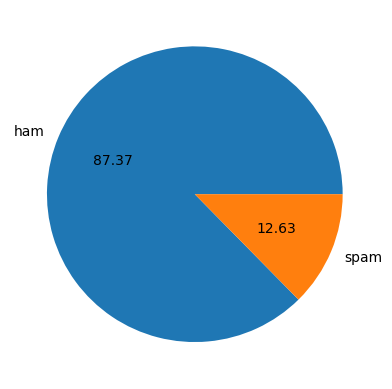

In [11]:
# Check the distribution of our target variable
df['target'].value_counts()

#Plot the pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

#Show the plot
plt.show()

**Interpretation:** As we can see here ham is more than spam which means our dataset is imbalanced.

In [12]:
#Find out the length or characters of each text
df['num_characters']=df['text'].apply(len)

df['num_characters']

#Check the first 5 rows
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
#Find out the number of words
df['num_Words']=df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

df['num_Words']

#Check the first 5 rows
df.head()

,target,text,num_characters,num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
#Find out the number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df['num_sentences']

#Check the first 5 rows
df.head()

,target,text,num_characters,num_Words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [13]:
#Describe the data
df[['num_characters','num_Words','num_sentences']].describe()

,num_characters,num_Words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [14]:
#Lets check the description of ham messages
df[df['target']==0][['num_characters','num_Words','num_sentences']].describe()

,num_characters,num_Words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [15]:
#Lets check the description of spam messages
df[df['target']==1][['num_characters','num_Words','num_sentences']].describe()

,num_characters,num_Words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


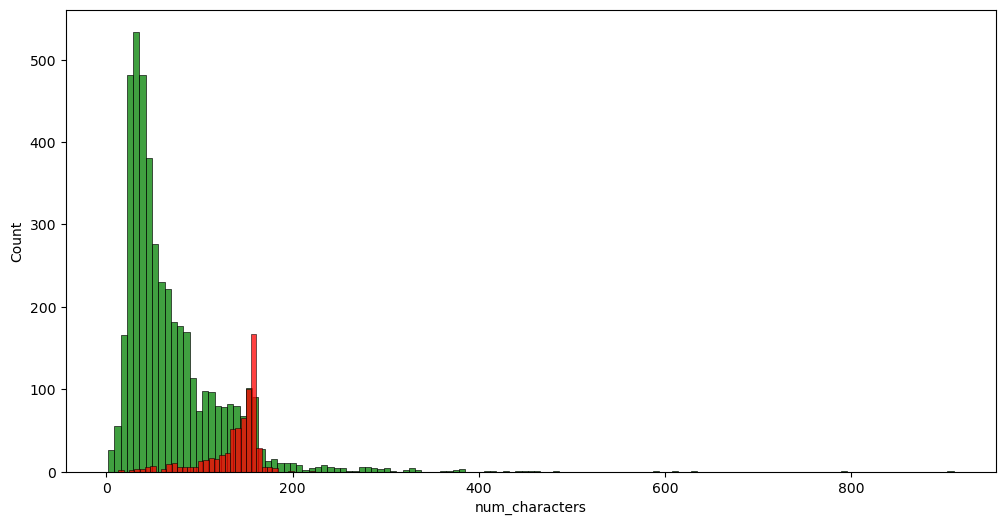

In [17]:
#Lets plot the histogram for num_characters

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

#Show the plot
plt.show()

**Interepretation:** As we can see there are more number of characters in spam messages than in ham messages.

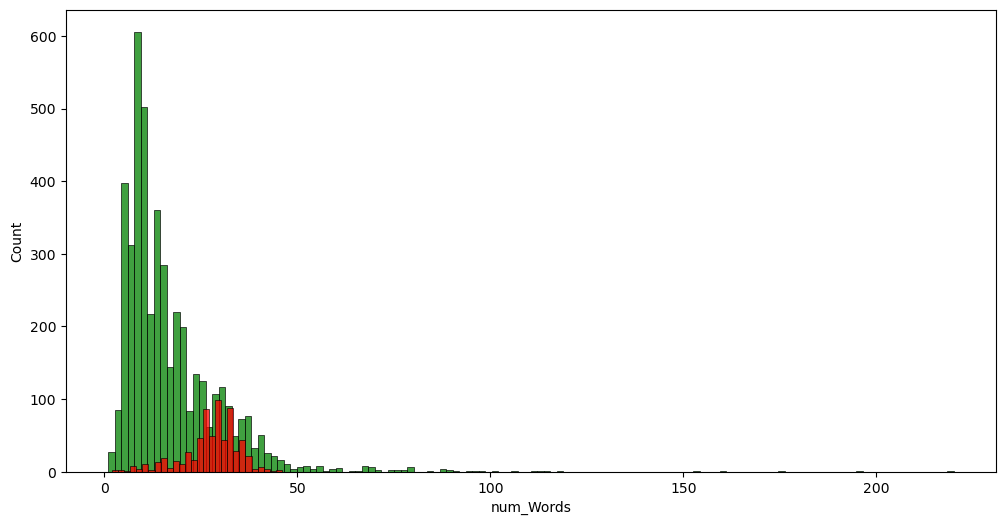

In [18]:
#Lets plot the histogram for num_Words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_Words'],color='green')
sns.histplot(df[df['target']==1]['num_Words'],color='red')

#Show the plot
plt.show()

**Interpretation:** There are more number of words in spam messages than in ham messages.

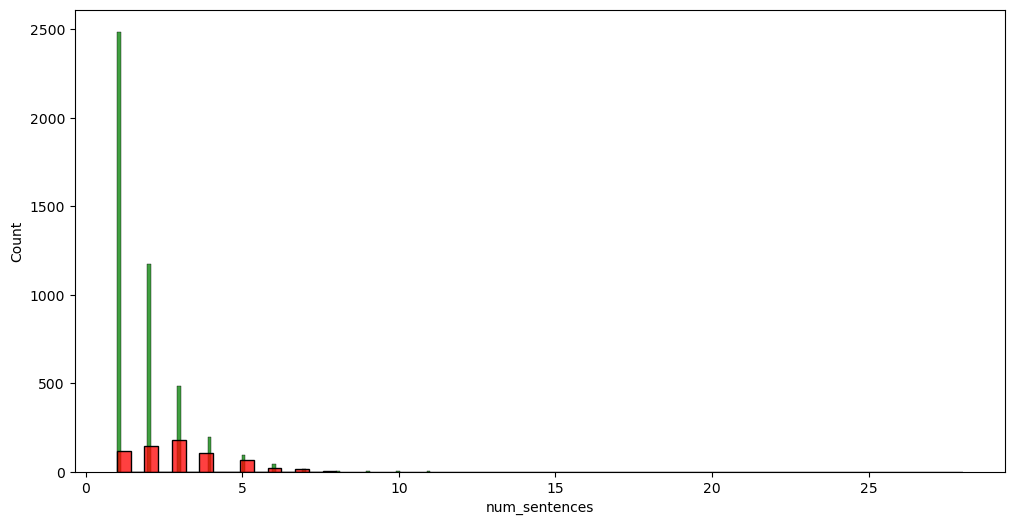

In [19]:
# Lets plot the histogram for num_sentences

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'],color='green')
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

#Show the plot
plt.show()


**Interpretation:** As we can see from the histograms, the number of sentences in spam messages is higher than that of the ham messages.

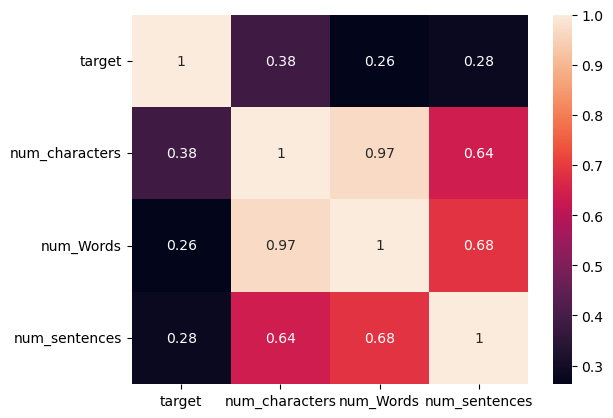

In [20]:
#Lets check the correlation

df.corr()

#Plot the heatmap
sns.heatmap(df.corr(),annot=True)

#Show the plot
plt.show()


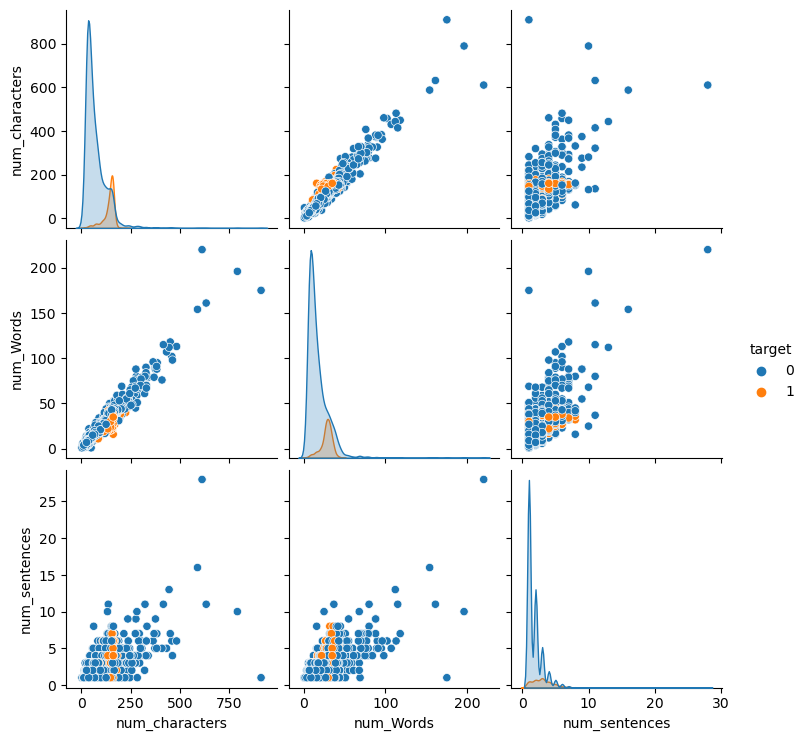

In [21]:
#Lets plot the pairplot
sns.pairplot(df,hue='target')

#Show the plot
plt.show()


In [33]:
#Install wordcloud
#!pip install wordcloud
#from wordcloud import WordCloud

#Lets Create a word cloud for spam messages 
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='Black')

In [35]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

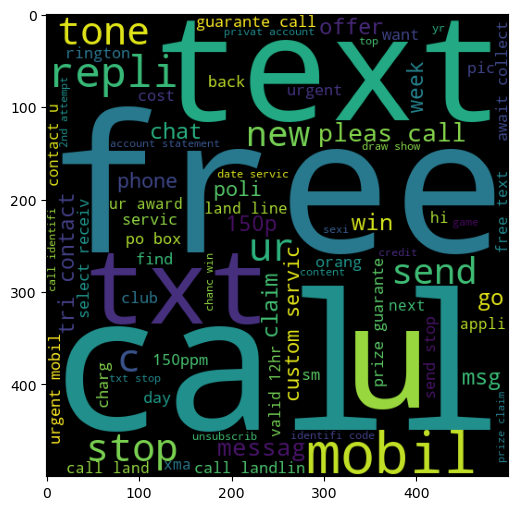

In [38]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [41]:
#Lets create word cloud for ham messages
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='Black')

In [44]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

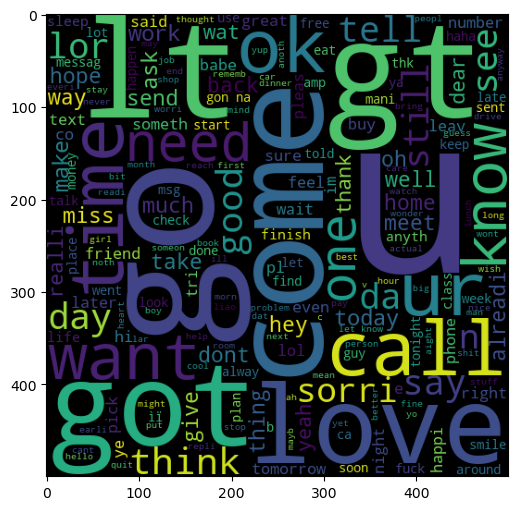

In [45]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [19]:
#Find out the most common spam word


spam_list=df[df['target']==1]['transformed_text'].tolist()    #Created list of spam messages

spam_corpus=[]                         #Create an empty list 
for msg in spam_list:                  #For loop for extracting the msgs from the  spam_list
    for words in msg.split():          #Split the words
        spam_corpus.append(words)      #Append the words to the list
    


In [20]:
#Lets check the spam words
spam_corpus

#Length of the spam corpus
len(spam_corpus)

9939

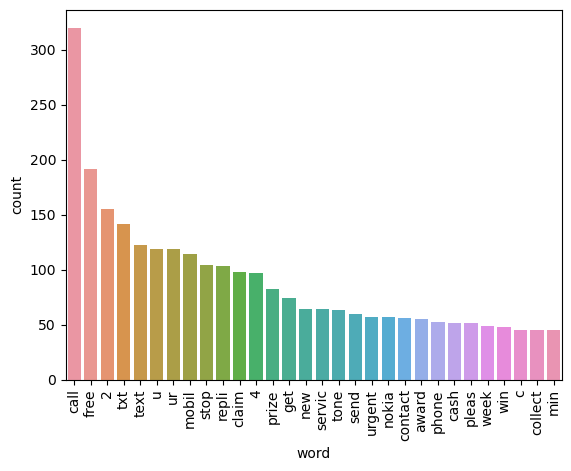

In [21]:
from collections import Counter

# Count the most common 30 words
most_common_words = Counter(spam_corpus).most_common(30)

# Convert the most common words into a DataFrame
df_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot the data
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()


In [22]:
#Find out the most common ham word


ham_list=df[df['target']==0]['transformed_text'].tolist()    #Created list of ham messages

ham_corpus=[]                         #Create an empty list 
for msg in ham_list:                  #For loop for extracting the msgs from the  spam_list
    for words in msg.split():          #Split the words
        ham_corpus.append(words)      #Append the words to the list


In [23]:
#Lets check the spam words
ham_corpus

#Length of the spam corpus
len(ham_corpus)

35394

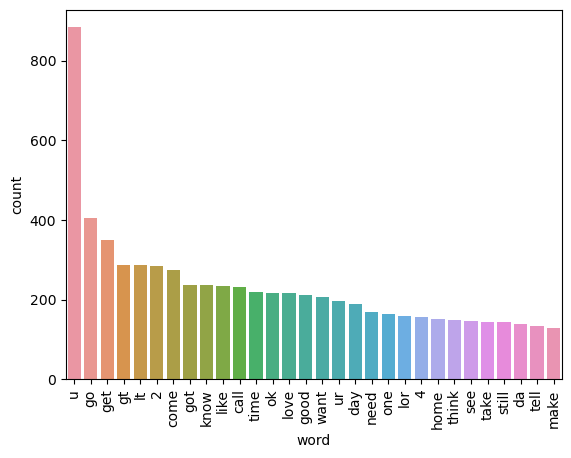

In [44]:
from collections import Counter

# Count the most common 30 words
most_common_words = Counter(ham_corpus).most_common(30)

# Convert the most common words into a DataFrame
df_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot the data
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

## 3. Data Preprocessing
**Lower Casing**

**Tokenization**

**Removing special characters**

**Removing stopwords and punctuations**

**Stemming**

In [16]:
def transform_text(text):
    text=text.lower()               #For lower casing the text
    
    text=nltk.word_tokenize(text)   #For tokenizing the text
    
    y=[]                            #Create one empty list
    for i in text:                  #For loop for extracting the text
        if i.isalnum():             #If the text is alphanumeric
            y.append(i)             #Append the text to the list
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation: #If the text is not in stopwords and punctuation
            y.append(i)                                                        #Append the text to the list
            
            
    text=y[:]
    y.clear()
    
    for i in text:  
            y.append(ps.stem(i))       #For stemming the text
 
    return " ".join(y)                 #Return the text in string formaty

In [17]:
#Lets check the transform_text function
transform_text("hello, hi my name is Neha.How are you? do u like dancing,singing ,cooking???? %#$$$@! 123")

'hello hi name u like danc sing cook 123'

In [18]:
#Lets apply the transform_text function on the text column
df['transformed_text']=df['text'].apply(transform_text)

#Check the first 5 rows
df.head()


,target,text,num_characters,num_Words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model Building

In [60]:
#Lets convert transformed_text into vectors using Bag of Words

#import CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [61]:
#Lets fit and transform the data
X=tfidf.fit_transform(df['transformed_text']).toarray()

#Show the shape
X.shape

(5169, 3000)

In [62]:
#Lets check the Y variable
Y=df['target'].values

#Show the shape
Y.shape

(5169,)

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [49]:
#Using GaussianNB
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
#mnb.fit(X_train,Y_train)
#bnb.fit(X_train,Y_train)

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [66]:
#Using MultinomialNB
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [51]:
#Using BernoulliNB
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


**Interpretation:** As we know our data is imbalanced so our accuracy score is not that good.We will use the precision score.
                    SO we will use precision score of multinomialNB and embedding technique as tfidf, because it is giving us the best precision score 


In [52]:
#Lets try with other models as well
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [54]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [55]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    precision=precision_score(Y_test,y_pred)
    
    return accuracy,precision

In [56]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [57]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [41]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


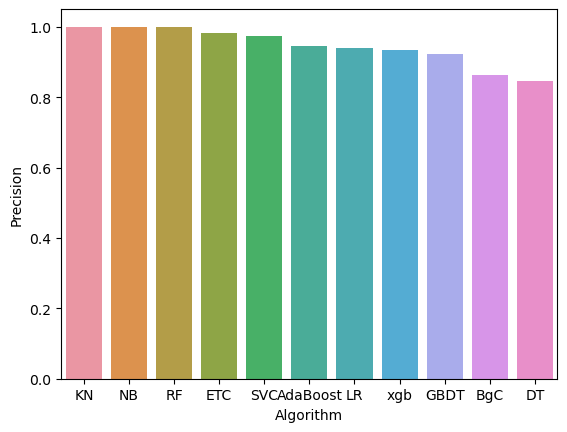

In [42]:
sns.barplot(x='Algorithm',y='Precision',data=performance_df)

plt.show()

In [58]:
#Model Improvement
#1. Change the max_features parameter of Tfidf

temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

temp_df


,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [59]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,xgb,0.969052,0.934426,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188


In [67]:
import pickle as pkl
pkl.dump(tfidf,open('vectorizer.pkl','wb'))
pkl.dump(mnb,open('model.pkl','wb'))